In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style("whitegrid", {'grid.linestyle': '--'})
sns.set_context("talk")
from sklearn.model_selection import KFold
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_score, train_test_split
import warnings
warnings.filterwarnings('ignore')

### Load Iris dataset

In [2]:
from sklearn.datasets import load_iris
iris = load_iris()

In [3]:
iris.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename'])

In [4]:
iris.feature_names

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

In [5]:
iris.DESCR

'.. _iris_dataset:\n\nIris plants dataset\n--------------------\n\n**Data Set Characteristics:**\n\n    :Number of Instances: 150 (50 in each of three classes)\n    :Number of Attributes: 4 numeric, predictive attributes and the class\n    :Attribute Information:\n        - sepal length in cm\n        - sepal width in cm\n        - petal length in cm\n        - petal width in cm\n        - class:\n                - Iris-Setosa\n                - Iris-Versicolour\n                - Iris-Virginica\n                \n    :Summary Statistics:\n\n    ============== ==== ==== ======= ===== ====================\n                    Min  Max   Mean    SD   Class Correlation\n    ============== ==== ==== ======= ===== ====================\n    sepal length:   4.3  7.9   5.84   0.83    0.7826\n    sepal width:    2.0  4.4   3.05   0.43   -0.4194\n    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)\n    petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)\n    ============== ==== =

In [6]:
t_names = iris.target_names

In [7]:
data = pd.DataFrame(iris.data,columns=iris.feature_names)

In [8]:
data['target'] = iris.target

In [9]:
data.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [10]:
# Replacing the target with species names
data['target'].replace({0:t_names[0],1:t_names[1],2:t_names[2]},inplace=True)

In [11]:
data.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [12]:
# Replacing the feature names with short names
data.columns = ['sl','sw','pl','pw','target']

In [13]:
data.head()

,sl,sw,pl,pw,target
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [14]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   sl      150 non-null    float64
 1   sw      150 non-null    float64
 2   pl      150 non-null    float64
 3   pw      150 non-null    float64
 4   target  150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [15]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
sl,150.0,5.843333,0.828066,4.3,5.1,5.80,6.4,7.9
sw,150.0,3.057333,0.435866,2.0,2.8,3.00,3.3,4.4
pl,150.0,3.758000,1.765298,1.0,1.6,4.35,5.1,6.9
pw,150.0,1.199333,0.762238,0.1,0.3,1.30,1.8,2.5


In [16]:
data.target.value_counts()

versicolor    50
virginica     50
setosa        50
Name: target, dtype: int64

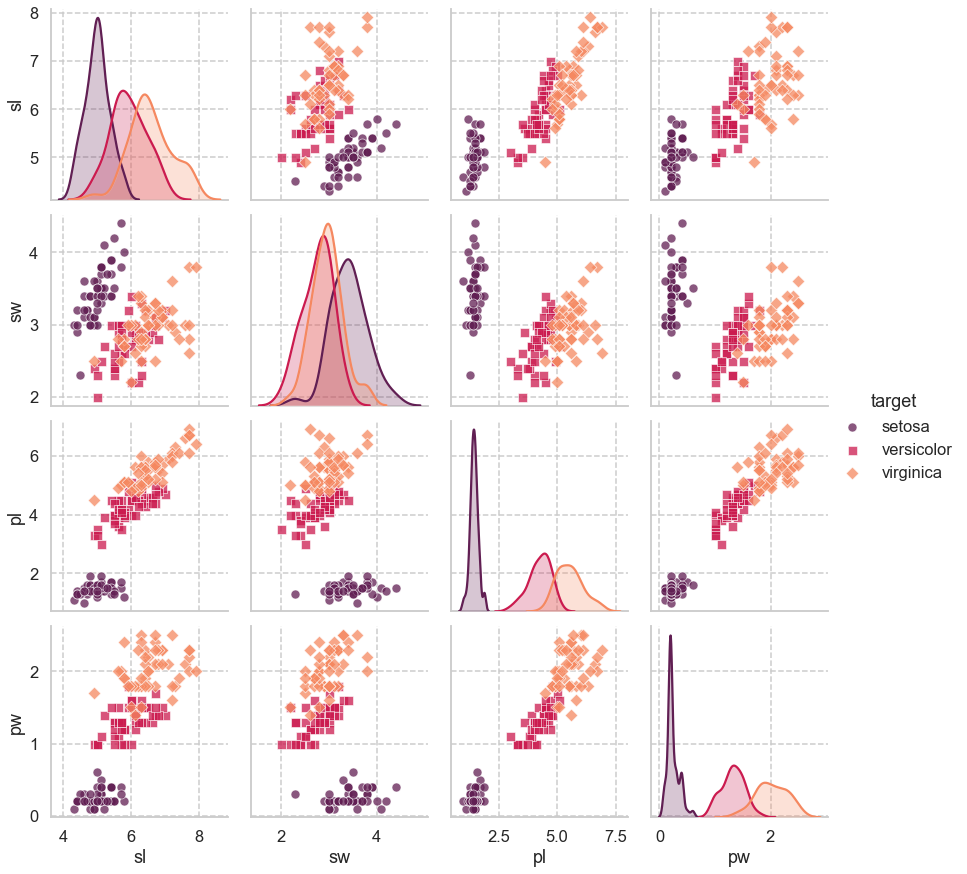

In [17]:
# The pairplot shows the bivariate relation between every pair of features in the data
sns.pairplot(data,hue='target',size=3,palette='rocket',markers=["o", "s", "D"],plot_kws={'edgecolor':'w','alpha':0.75})
plt.show()

From the pairplot, its clearing showing that the Iris-Setosa is distinctly separated from the other two species across all feature combination

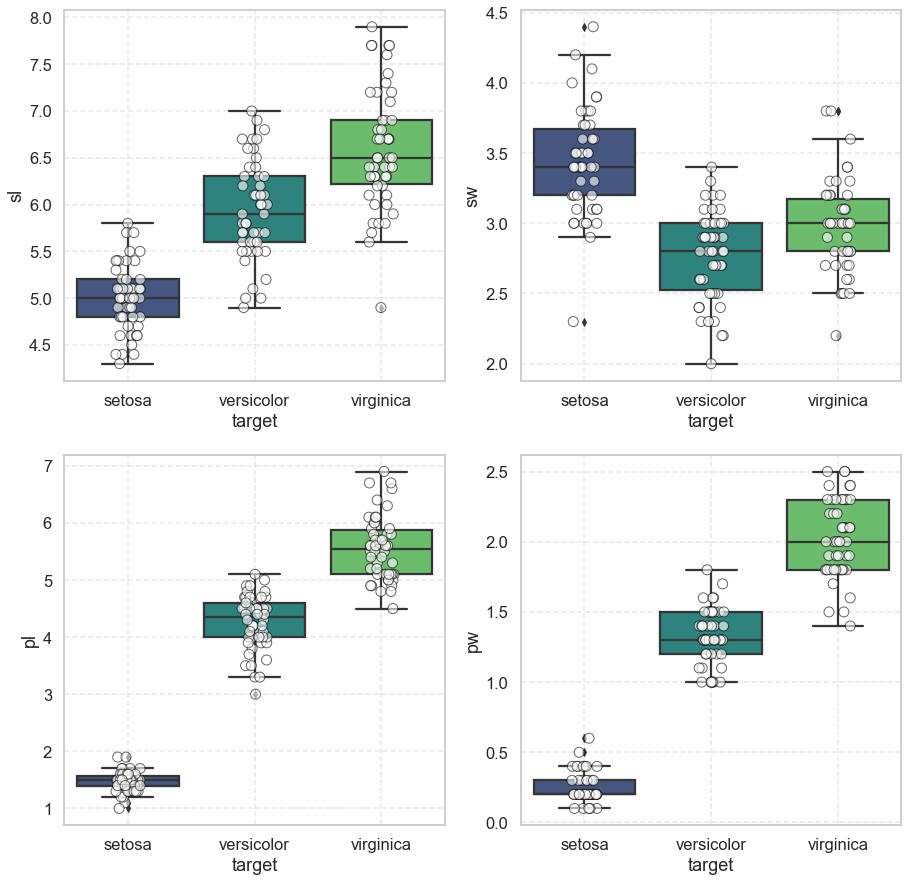

In [18]:
plt.figure(figsize=(15,15))

plt.subplot(2,2,1)
sns.boxplot(x='target',y='sl',data=data,palette='viridis')
sns.stripplot(x='target',y='sl',data=data,edgecolor='k',s=10,linewidth=1,color='w',alpha=0.6)
plt.grid(alpha=0.45)

plt.subplot(2,2,2)
sns.boxplot(x='target',y='sw',data=data,palette='viridis')
sns.stripplot(x='target',y='sw',data=data,edgecolor='k',s=10,linewidth=1,color='w',alpha=0.6)
plt.grid(alpha=0.45)

plt.subplot(2,2,3)
sns.boxplot(x='target',y='pl',data=data,palette='viridis')
sns.stripplot(x='target',y='pl',data=data,edgecolor='k',s=10,linewidth=1,color='w',alpha=0.6)
plt.grid(alpha=0.45)

plt.subplot(2,2,4)
sns.boxplot(x='target',y='pw',data=data,palette='viridis')
sns.stripplot(x='target',y='pw',data=data,edgecolor='k',s=10,linewidth=1,color='w',alpha=0.6)
plt.grid(alpha=0.45)

plt.show()

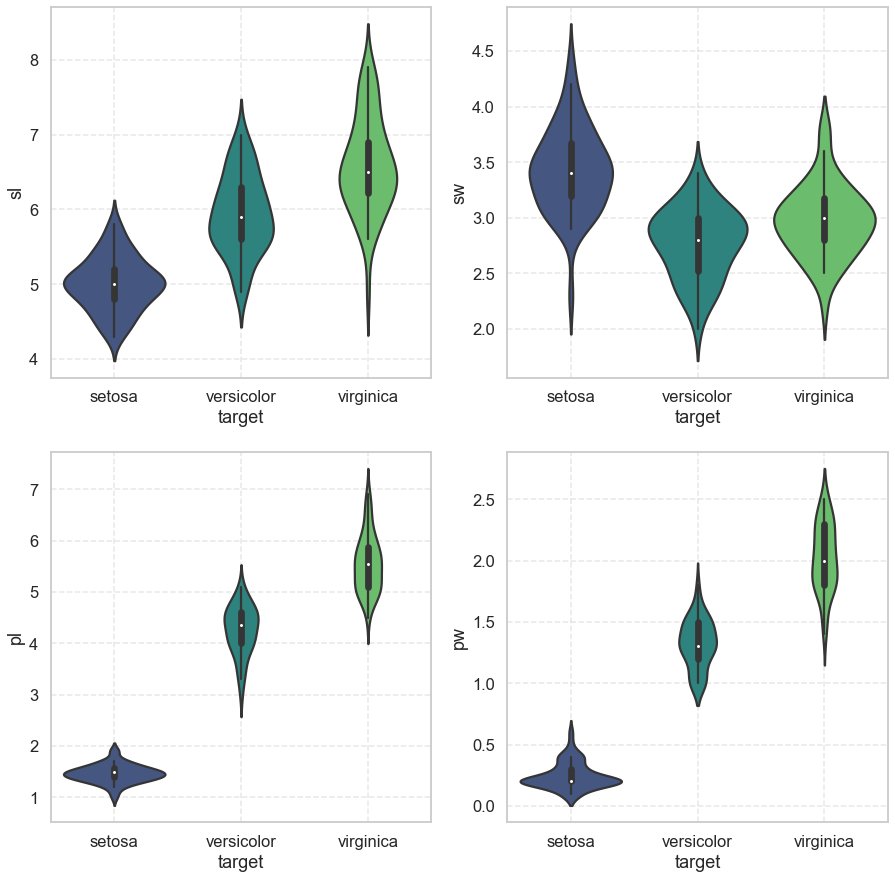

In [ ]:
# Violinplot is a simplified version of the previous plot
# It combines the benifits of the box and strip plot
# Denser regions of the data are fatter and sparser regions are thinner in  a violin plot

plt.figure(figsize=(15,15))

plt.subplot(2,2,1)
sns.violinplot(x='target',y='sl',data=data,palette='viridis',)
plt.grid(alpha=0.45)

plt.subplot(2,2,2)
sns.violinplot(x='target',y='sw',data=data,palette='viridis',)
plt.grid(alpha=0.45)

plt.subplot(2,2,3)
sns.violinplot(x='target',y='pl',data=data,palette='viridis',)
plt.grid(alpha=0.45)

plt.subplot(2,2,4)
sns.violinplot(x='target',y='pw',data=data,palette='viridis',)
plt.grid(alpha=0.45)

plt.show()

In [ ]:
plt.figure(figsize=(10,7))
sns.heatmap(data.corr(),annot=True)
plt.show()

HC - pl
LC - sw

In [ ]:
data.head()

In [ ]:
data.target = iris.target

In [ ]:
data.head()

## Splitting Data into training and testing dataset / KFold crossvalidation

In [ ]:
x = data[['sl','sw','pl','pw']]
y = data['target']

In [ ]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.3)
print(y_train.value_counts())
print(y_test.value_counts())

### Logistic Regression

In [ ]:
lr = LogisticRegression()
lr_model = lr.fit(x_train,y_train)
lr_acc = lr_model.score(x_test,y_test)
print("Accuracy : ",lr_acc)

In [ ]:
lr = LogisticRegression()
cv = KFold(n_splits=5)
scores = cross_val_score(lr, x, y, cv=cv)
lr_acc_k = scores.mean()
print("Accuracy: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std() * 2))

### Descision Tree Classifier

In [ ]:
dt = DecisionTreeClassifier()
dt_model = dt.fit(x_train,y_train)
dt_acc = dt_model.score(x_test,y_test)
print("Accuracy : ",dt_acc)

In [ ]:
dt = DecisionTreeClassifier()
cv = KFold(n_splits=5)
scores = cross_val_score(dt, x, y, cv=cv)
dt_acc_k = scores.mean()
print("Accuracy: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std() * 2))

### Support Vector Machine

In [ ]:
svm = SVC()
svm_model = svm.fit(x_train,y_train)
svm_acc = dt_model.score(x_test,y_test)
print("Accuracy : ",svm_acc)

In [ ]:
svm = SVC()
cv = KFold(n_splits=5)
scores = cross_val_score(svm, x, y, cv=cv)
svm_acc_k = scores.mean()
print("Accuracy: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std() * 2))

### K-Nearest Neighbors

In [ ]:
# Finding accuracy for various values of n for K-Nearest neighbors
acc = []
score = []
cv = KFold(n_splits=5)
for i in range(1,11):
    print('K = ',i)
    knn = KNeighborsClassifier(n_neighbors=i)
    knn_model = knn.fit(x_train,y_train)
    print("Accuracy : ",knn_model.score(x_test,y_test))
    acc.append(knn_model.score(x_test,y_test))

knn_acc = max(acc)
sns.lineplot([i for i in range(1,11)],acc)
plt.xticks(np.arange(1,11))
plt.show()

In [ ]:
# Finding accuracy for various values of n for K-Nearest neighbors
acc = []
score = []
cv = KFold(n_splits=5)
for i in range(1,11):
    print('K = ',i)
    knn = KNeighborsClassifier(n_neighbors=i)
    scores = cross_val_score(knn, x, y, cv=cv)
    score.append(scores.mean())
    print("Accuracy: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std() * 2))
    for s in scores:
        acc.append([i,s])

knn_acc_k = max(score)
sc = pd.DataFrame(np.array(acc))
sns.lineplot(data=sc,x=0,y=1)
plt.xticks(np.arange(1,11))
# plt.yticks(np.arange(0.5,1.01,0.1))
plt.xlabel('K')
plt.ylabel('Accuracy')
plt.show()

In [ ]:
plt.figure(figsize=(10,5))
height = [lr_acc,lr_acc_k, dt_acc,dt_acc_k, svm_acc,svm_acc_k, knn_acc,knn_acc_k]
bars = ('LR','K-LR', 'DT','K-DT', 'SVM','K-SVM', 'KNN','K-KNN')
y_pos = np.arange(len(bars))
plt.bar(bars, height)
plt.xlabel('Models')
plt.ylabel('Accuracy(%)')
plt.yticks(np.arange(0,1.1,0.2))
plt.show()